<a href="https://colab.research.google.com/github/hana-magdy/Image-Segmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [2]:
import zipfile
import os
import numpy as np
from PIL import Image
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import math
import cv2
import sklearn.cluster as SC
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from random import randint


In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1.Download the Dataset and Understand the Format.

In [5]:
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Pattern Recognition projects/Image Segmentation/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Pattern Recognition projects/Image Segmentation/set.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
Names=os.listdir('/content/Dataset/images/train/')
print(Names)
Names.remove('Thumbs.db')

Images_Path='/content/Dataset/images/train/'
groundTruth_Path='/content/Dataset/groundTruth/train/'

images=[]
groundTruth=[]

for name in Names:
  img = cv2.imread(str(Images_Path+name))
  images.append(np.array(img))
  mat = scipy.io.loadmat(str(groundTruth_Path+str(name.replace('.jpg','.mat'))))
  groundTruth.append(mat)
  



#print(np.array(images).shape)
#print(np.array(images[0]))
#print(np.array(images[1]).shape)
#print(np.array(images[2]).shape)
#print(np.array(images[3]).shape)
#print(np.array(images[4]).shape)
#print(np.array(images[0]))



['365073.jpg', '388016.jpg', '271031.jpg', '113009.jpg', '188091.jpg', '106020.jpg', '216066.jpg', '187039.jpg', '207056.jpg', '157036.jpg', '66039.jpg', '172032.jpg', '314016.jpg', '311068.jpg', '124084.jpg', '42044.jpg', '55067.jpg', '232038.jpg', '117054.jpg', '374020.jpg', '23084.jpg', '138032.jpg', '249061.jpg', '227040.jpg', '35058.jpg', '22013.jpg', '202012.jpg', '33066.jpg', '104022.jpg', '372047.jpg', '68077.jpg', '134052.jpg', '153093.jpg', '176019.jpg', '118020.jpg', '41004.jpg', '108041.jpg', '61060.jpg', '164074.jpg', '198023.jpg', '238011.jpg', '302003.jpg', '61086.jpg', '112082.jpg', '23080.jpg', '76002.jpg', '60079.jpg', '385028.jpg', '24063.jpg', '145014.jpg', '87065.jpg', '187003.jpg', '27059.jpg', '216053.jpg', '155060.jpg', '65010.jpg', '310007.jpg', '147021.jpg', '189011.jpg', 'Thumbs.db', '370036.jpg', '156079.jpg', '286092.jpg', '42078.jpg', '353013.jpg', '187083.jpg', '147062.jpg', '71046.jpg', '153077.jpg', '22093.jpg', '249087.jpg', '299091.jpg', '8049.jpg', '

##Visualization 

In [ ]:
def Visualization(index):
  plt.imshow(images[index])
  plt.figure()

  for i in range(0,5):
     plt.imshow(groundTruth[index]['groundTruth'][0][i][0][0][0])
     plt.figure()



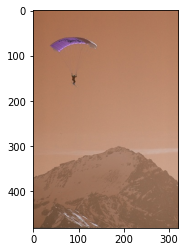

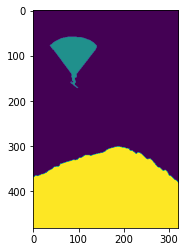

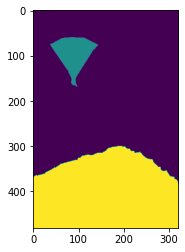

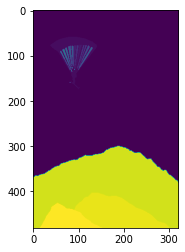

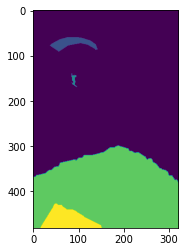

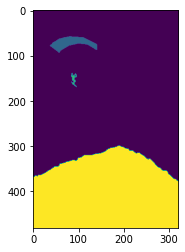

<Figure size 432x288 with 0 Axes>

In [ ]:
Visualization(88)

##K-Means Clustering

In [8]:
def kmeans(ind,k):
  #image = cv2.cvtColor(images[ind])
  image = cv2.cvtColor(images[ind], cv2.COLOR_BGR2RGB)
  pixel_vals = image.reshape((-1,3))
  pixel_vals = np.float32(pixel_vals)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_image = segmented_data.reshape((image.shape))
  return segmented_image,labels
  plt.imshow(segmented_image)

<Figure size 432x288 with 0 Axes>

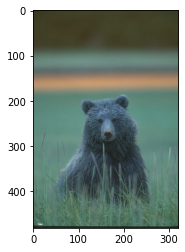

<Figure size 432x288 with 0 Axes>

In [14]:
plt.imshow(images[99])
plt.figure()

<Figure size 432x288 with 0 Axes>

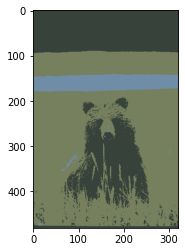

<Figure size 432x288 with 0 Axes>

In [13]:
Labels3 = []
images3=[]
for i in range(len(images)):
  segmented_image_3,Labels=kmeans(i,3)
  Labels3.append(Labels)
  images3.append(segmented_image_3)

plt.imshow(images3[99])
plt.figure()




<Figure size 432x288 with 0 Axes>

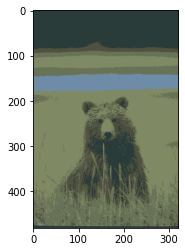

<Figure size 432x288 with 0 Axes>

In [12]:
Labels5 = []
images5=[]
for i in range(len(images)):
  segmented_image_5,Labels=kmeans(i,5)
  Labels5.append(Labels)
  images5.append(segmented_image_5)

plt.imshow(images5[99])
plt.figure()



<Figure size 432x288 with 0 Axes>

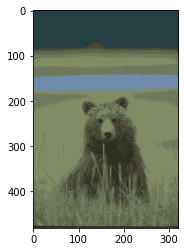

<Figure size 432x288 with 0 Axes>

In [11]:
Labels7 = []
images7=[]
for i in range(len(images)):
  segmented_image_7,Labels=kmeans(i,7)
  Labels7.append(Labels)
  images7.append(segmented_image_7)

plt.imshow(images7[99])
plt.figure()

<Figure size 432x288 with 0 Axes>

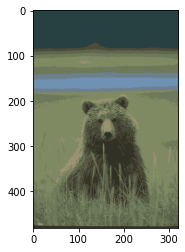

<Figure size 432x288 with 0 Axes>

In [9]:
Labels9 = []
images9=[]
for i in range(len(images)):
  segmented_image_9,Labels=kmeans(i,9)
  Labels9.append(Labels)
  images9.append(segmented_image_9)

plt.imshow(images9[99])
plt.figure()

<Figure size 432x288 with 0 Axes>

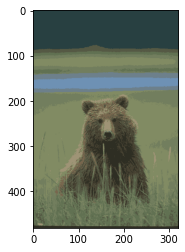

<Figure size 432x288 with 0 Axes>

In [10]:
Labels11 = []
images11=[]
for i in range(len(images)):
  segmented_image_11,Labels=kmeans(i,11)
  Labels11.append(Labels)
  images11.append(segmented_image_11)

plt.imshow(images11[99])
plt.figure()

### Question 3


In [ ]:
print("Kmeans for 1 image 99")
#Visualization(99)

segmented_image_3_trial,Trial_Label3=kmeans(99,3)

segmented_image_5_trial,Trial_Label5=kmeans(99,5)

segmented_image_7_trial,Trial_Label7=kmeans(99,7)

segmented_image_9_trial,Trial_Label9=kmeans(99,9)

segmented_image_11_trial,Trial_Label11=kmeans(99,11)

Total_Labels=[Trial_Label3, Trial_Label5, Trial_Label7, Trial_Label9, Trial_Label11]



Kmeans for 1 image 99


## F_Measure and Conditional Entropy

In [155]:
def Recall(cont_mat,i):
  cont_matT = cont_mat.T # 47,3
  max=np.amax(cont_mat[i])
  max_index_col = np.argmax(cont_mat[i])
  clusterSum=(np.sum(cont_matT[max_index_col]))
  exp=max/clusterSum
  #print("recall for cluster ",str(i)," = ",str(exp))
  return exp # rec_i


In [156]:
def Purity(cont_mat,i):
  clusterSum=(np.sum(cont_mat))
  max=np.amax(cont_mat)
  exp=max/clusterSum
  #print("purity for cluster ",str(i)," = ",str(exp))
  return exp # purity_i


In [157]:
def Fmeasure(cont_mat):
  total_F = 0
  for i in range(0,len(cont_mat)):
    prec_i = Purity(cont_mat[i],i)
    #print('prec_i = ' +str(prec_i))
    rec_i = Recall(cont_mat,i)
    #print('rec_i = ' +str(rec_i))
    Fi = (2*prec_i*rec_i)/(rec_i+prec_i)
    print('F-measure for cluster = '+str(i)+" = " +str(Fi))
    total_F = total_F+Fi
  print('Total F = '+str(total_F/len(cont_mat)))
  return total_F


In [158]:
def Conditional_entropy(cont_mat):
 
  totalEntropy=0

  for i in range (0,len(cont_mat)):
     clusterSum=(np.sum(cont_mat[i]))
     exp=0
     for j in range(0,len(cont_mat[0])):
       if cont_mat[i][j]!=0:
         exp=exp+((-1)*(cont_mat[i][j]/clusterSum)*(math.log(cont_mat[i][j]/clusterSum,2)))
  
     
     print("Entropy for cluster ",str(i)," = ",str(exp))
     totalEntropy=totalEntropy+((clusterSum/np.sum(cont_mat))*exp)
    
     
  print("Conditional Entropy(weighted sum of entropies) = ",totalEntropy)

  return totalEntropy

    

In [ ]:
K=[3,5,7,9,11]
for k in range(0,5):
  sumEntropy=0
  sumF = 0
  for s in range(0,5):
    print("for k=" +str(K[k])+ " and "+str(s+1) +" segmentation gt")
    print(np.array(groundTruth[99]['groundTruth'][0][s][0][0][0]).shape)
    CM=contingency_matrix(groundTruth[99]['groundTruth'][0][s][0][0][0], Total_Labels[k])
    print(CM.T.shape)
    entropy=Conditional_entropy(CM.T)
    sumEntropy=sumEntropy+entropy
    print('*******************F Measure Results************************** ')
    sumF = sumF+Fmeasure(CM.T)
    print("***********")
  print("Average entropy for k= ",str(K[k]),"=",str(sumEntropy/5))
  print("Average F-measure for k= ",str(K[k]),"=",str(sumF/5))
  print("*************************************************************************************")
  


for k=3 and 1 segmentation gt
(481, 321)
(3, 47)
Entropy for cluster  0  =  1.3627436900788241
Entropy for cluster  1  =  2.504248839644856
Entropy for cluster  2  =  2.6747787076949825
Conditional Entropy(weighted sum of entropies) =  2.175221882594562
*******************F Measure Results************************** 
F-measure for cluster = 0 = 0.8664760512511823
F-measure for cluster = 1 = 0.607680992818383
F-measure for cluster = 2 = 0.6786173438447544
Total F = 0.7175914626381066
***********
for k=3 and 2 segmentation gt
(481, 321)
(3, 28)
Entropy for cluster  0  =  1.6434648931823301
Entropy for cluster  1  =  1.5937096801390043
Entropy for cluster  2  =  2.6149508340557106
Conditional Entropy(weighted sum of entropies) =  1.9689974482972303
*******************F Measure Results************************** 
F-measure for cluster = 0 = 0.8106984259709149
F-measure for cluster = 1 = 0.6249033948992507
F-measure for cluster = 2 = 0.5812178096159377
Total F = 0.6722732101620345
***********

In [ ]:
Total_Labels3=[]
Total_Labels5=[]
Total_Labels7=[]
Total_Labels9=[]
Total_Labels11=[]

for i in range(0,len(images)):

  segmented_image_3_trial,Trial_Label3=kmeans(i,3)
  Total_Labels3.append(Trial_Label3)
  
  segmented_image_5_trial,Trial_Label5=kmeans(i,5)
  Total_Labels5.append(Trial_Label5)
  
  segmented_image_7_trial,Trial_Label7=kmeans(i,7)
  Total_Labels7.append(Trial_Label7)
  
  segmented_image_9_trial,Trial_Label9=kmeans(i,9)
  Total_Labels9.append(Trial_Label9)
  
  segmented_image_11_trial,Trial_Label11=kmeans(i,11)
  Total_Labels11.append(Trial_Label11)

Total_Labels=[Total_Labels3,Total_Labels5,Total_Labels7,Total_Labels9,Total_Labels11]
TotalDataset(Total_Labels)
  
  

##Question 4

In [ ]:
#idx=[randint(0, 199),randint(0, 199),randint(0, 199),randint(0, 199),randint(0, 199)]
idx=[81,168,197,143,31]
TrialImages=[]
TrialGT=[]
for i in idx :
  TrialImages.append(images[i])
  temp=[]
  for j in range(0,5):
    temp.append(groundTruth[i]['groundTruth'][0][j][0][0][0])
  TrialGT.append(temp)

print(np.array(TrialImages).shape)

(5, 321, 481, 3)


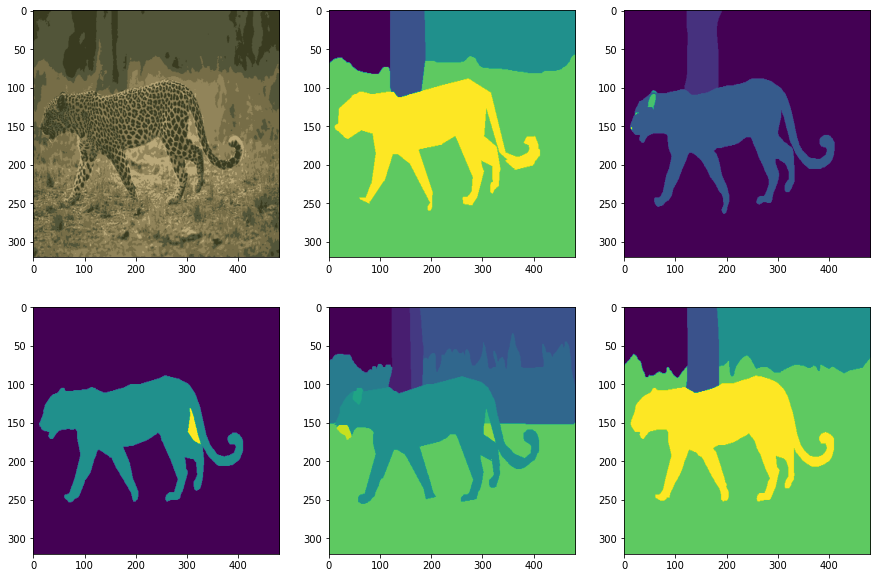

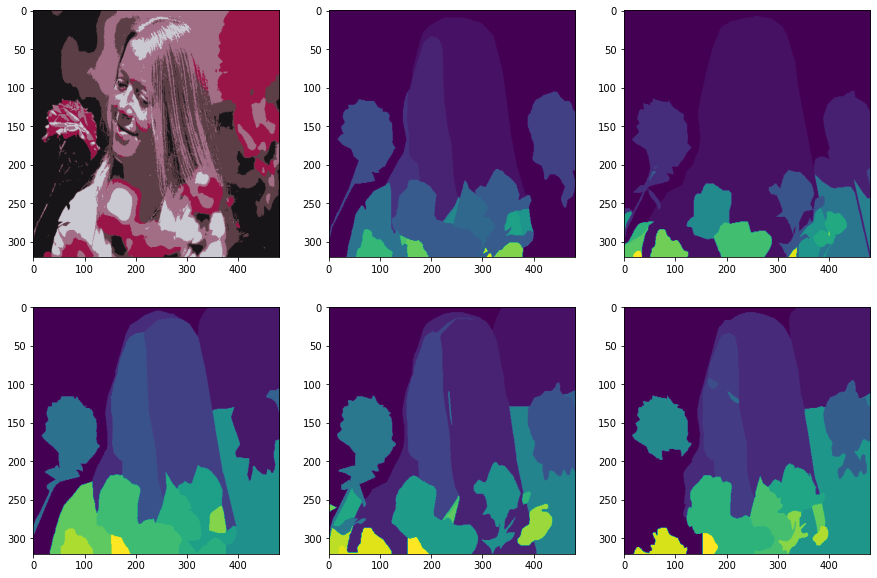

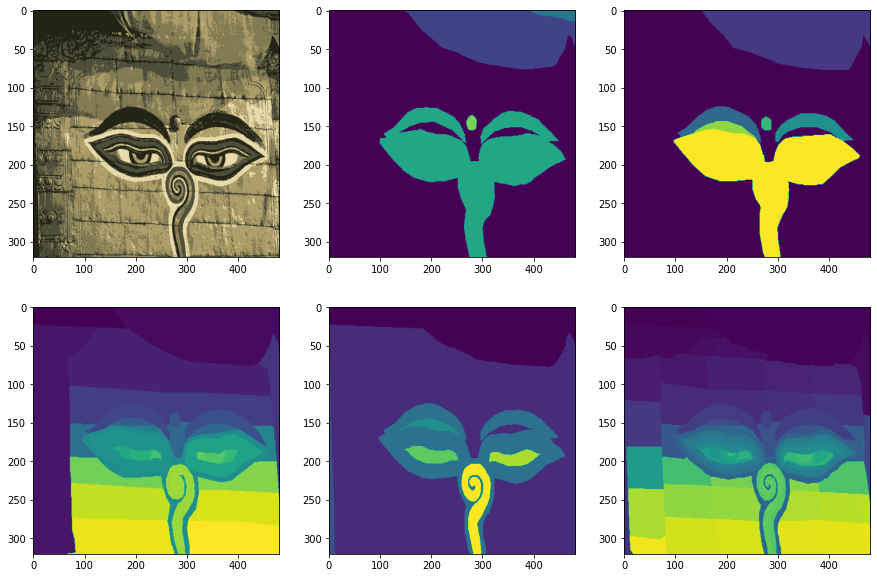

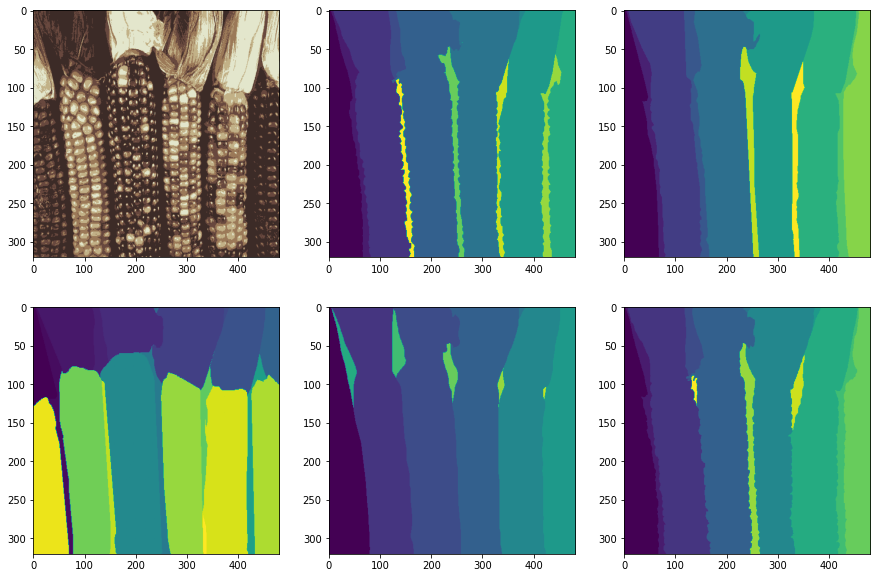

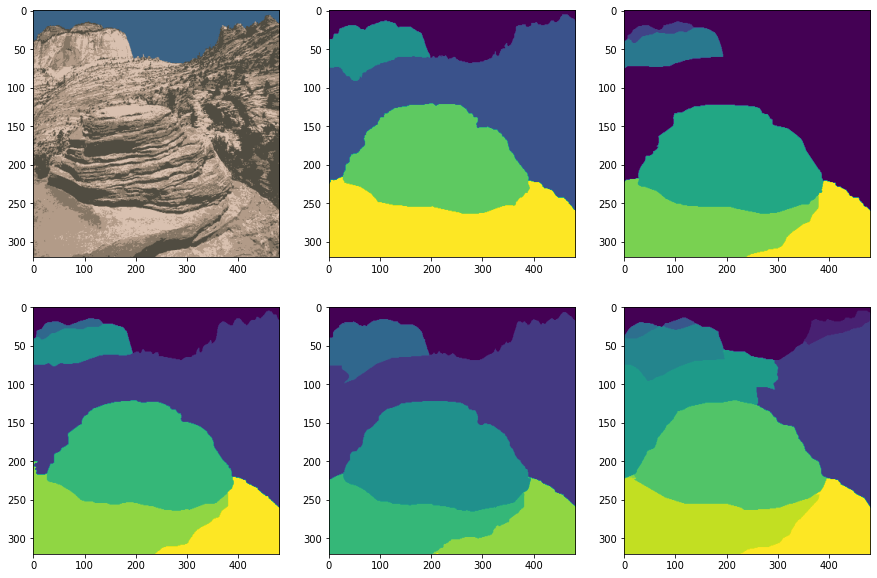

In [ ]:
Segmented_imgs=[]
Segmented_Labels=[]

for i in idx:
  seg_img,seg_label=kmeans(i,5)
  Segmented_imgs.append(seg_img)
  Segmented_Labels.append(seg_label)

  


for i in range(0,5):
  f, axarr = plt.subplots(2,3,figsize=(15,10))
  axarr[0,0].imshow(Segmented_imgs[i],aspect='auto')
  axarr[0,1].imshow(TrialGT[i][0],aspect='auto')
  axarr[0,2].imshow(TrialGT[i][1],aspect='auto')
  axarr[1,0].imshow(TrialGT[i][2],aspect='auto')
  axarr[1,1].imshow(TrialGT[i][3],aspect='auto')
  axarr[1,2].imshow(TrialGT[i][4],aspect='auto')






In [ ]:
print(idx)

[81, 168, 197, 143, 31]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


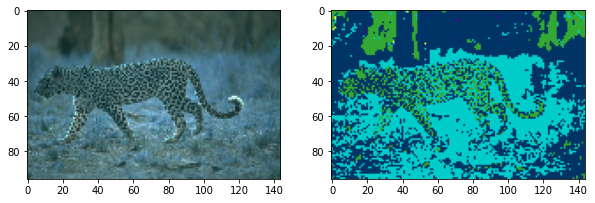

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


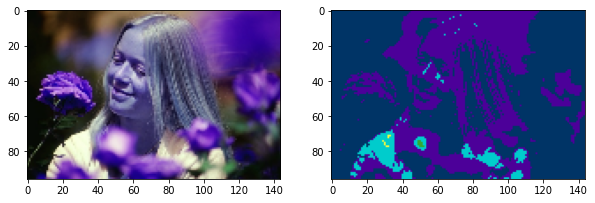

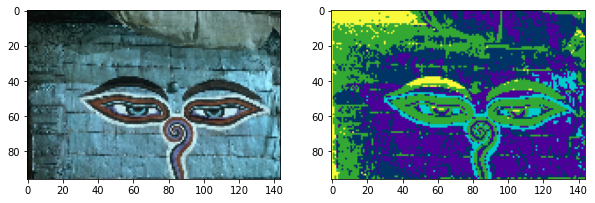

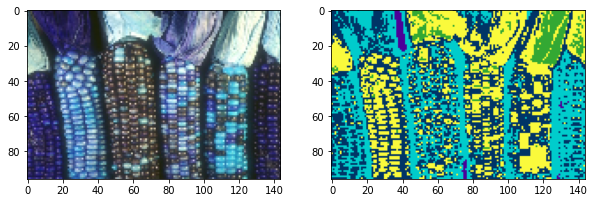

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


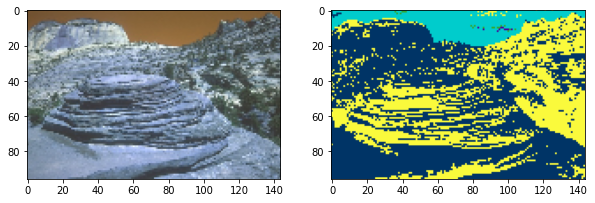

In [ ]:
Segmented_imgsN=[]
LabelsN=[]
colors = [[0,204,204],[0,52,102],[51,168,51],[250,250,60],[76,0,153]]


for i in range(0,5):
  x,y,z=TrialImages[i].shape
  h=int(x*0.30)
  w=int(y*0.30)
  img = Image.fromarray(TrialImages[i].astype('uint8'))
 # print(img.size)
  img = cv2.resize(TrialImages[i], dsize=(w,h))
  #plt.imshow(img)
  #plt.show()
  
  #img = cv2.GaussianBlur(img,(5,5),0)
  #plt.imshow(img)
  #plt.show()
  
  
  temp=np.array(img).reshape(-1,3)
  
  
  #print(temp.shape)

  clustering=SC.SpectralClustering(n_clusters=5,affinity='nearest_neighbors',n_neighbors=5,n_jobs=-1).fit(temp)

  tl=clustering.labels_
  LabelsN.append(tl)
  #tl=tl.reshape(120,80)
  #print(tl)
  #print(clustering.labels_.shape)
  
  formedimg=[]
 
  for j in  range(0,len(tl)):
    formedimg.append(colors[tl[j]])


  formedimg=np.array(formedimg)
  
  #print(formedimg)
  #print(formedimg.shape)
  formedimg=formedimg.reshape(h,w,3)
  Segmented_imgsN.append(formedimg)



  f, axarr = plt.subplots(1,2,figsize=(10,10))
  axarr[0].imshow(img)
  axarr[1].imshow(Image.fromarray((formedimg).astype(np.uint8)))
  plt.show()




  


#for i in range(0,5):
#  f, axarr = plt.subplots(2,3)
#  axarr[0,0].imshow(Segmented_imgs[i])
#  axarr[0,1].imshow(TrialGT[i][0])
#  axarr[0,2].imshow(TrialGT[i][1])
#  axarr[1,0].imshow(TrialGT[i][2])
#  axarr[1,1].imshow(TrialGT[i][3])
#  axarr[1,2].imshow(TrialGT[i][4])


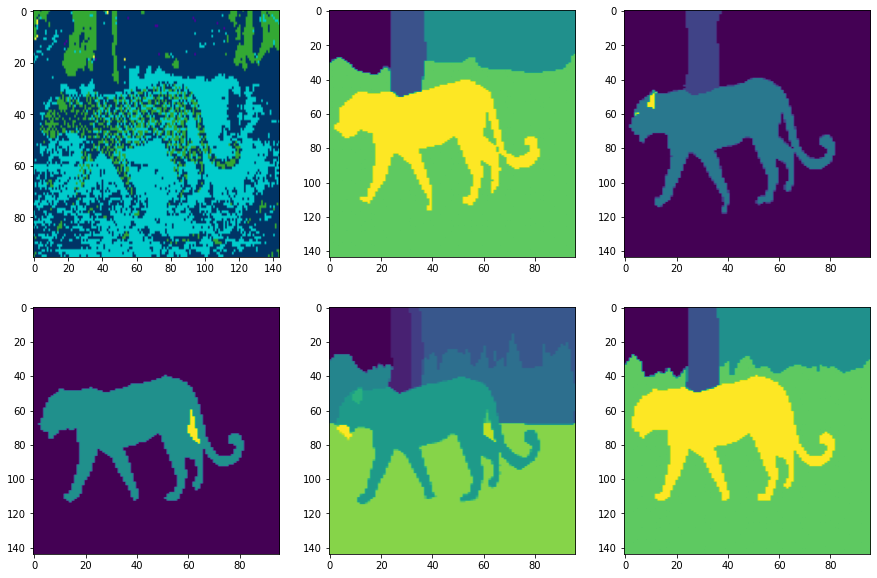

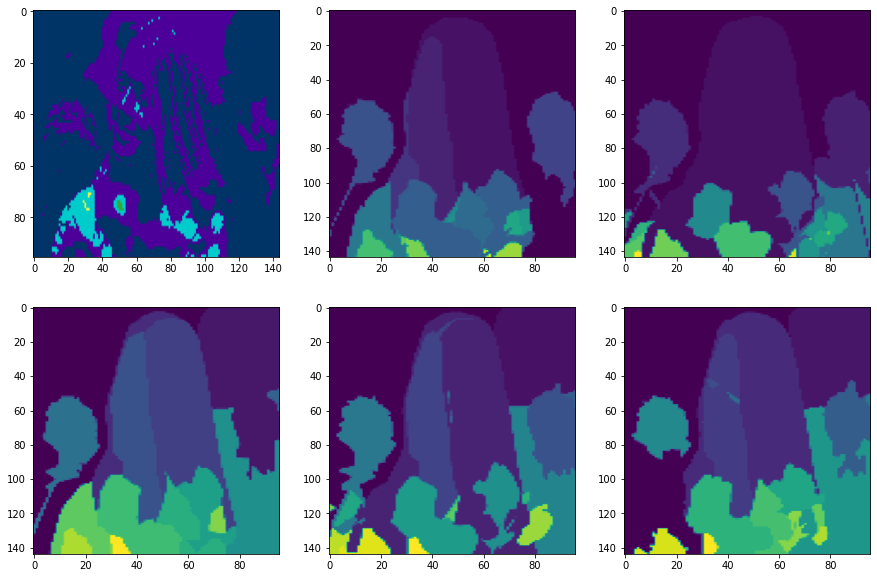

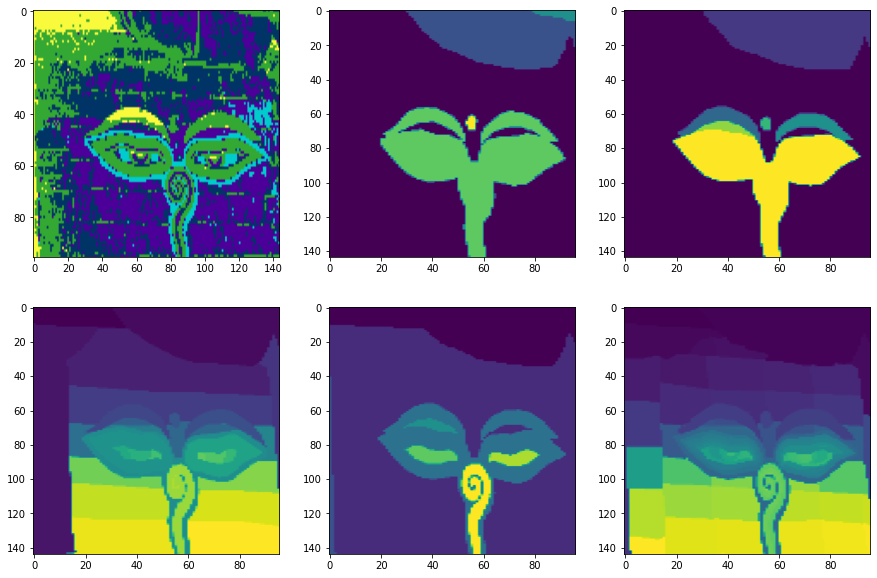

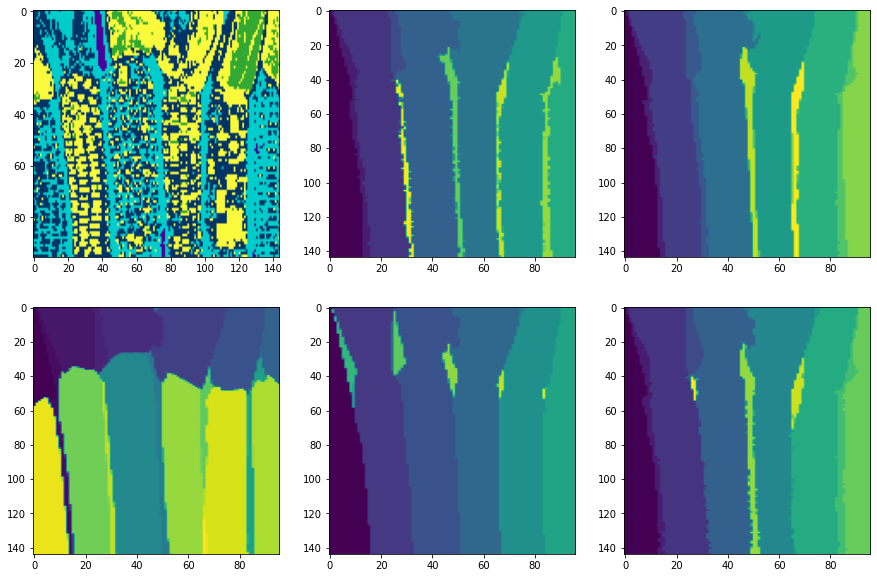

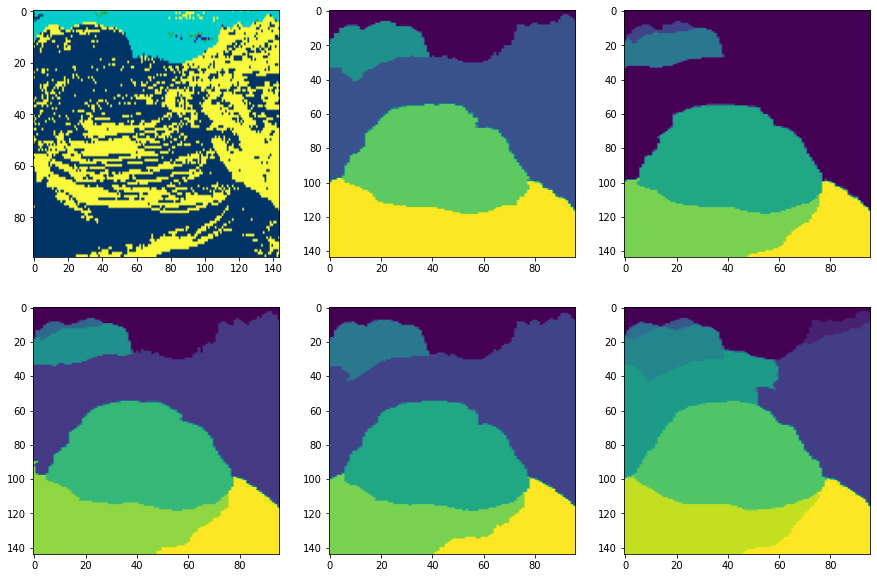

In [166]:
for i in range(0,5):
  f, axarr = plt.subplots(2,3,figsize=(15,10))
  axarr[0,0].imshow(Segmented_imgsN[i],aspect='auto')
  x=np.array(Segmented_imgsN[i].shape[0])
  y=np.array(Segmented_imgsN[I].shape[1])
  t1=cv2.resize(TrialGT[i][0], dsize=(x,y))
  t2=cv2.resize(TrialGT[i][1], dsize=(x,y))
  t3=cv2.resize(TrialGT[i][2], dsize=(x,y))
  t4=cv2.resize(TrialGT[i][3], dsize=(x,y))
  t5=cv2.resize(TrialGT[i][4], dsize=(x,y))
  axarr[0,1].imshow(t1,aspect='auto')
  axarr[0,2].imshow(t2,aspect='auto')
  axarr[1,0].imshow(t3,aspect='auto')
  axarr[1,1].imshow(t4,aspect='auto')
  axarr[1,2].imshow(t5,aspect='auto')

image  1


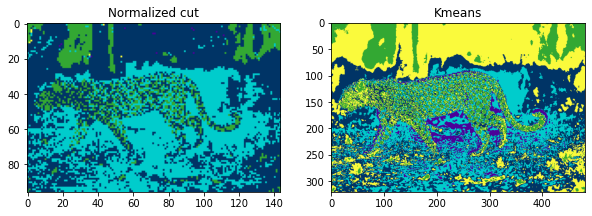

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  0.6700912691237635
Entropy for cluster  1  =  0.765615165117441
Entropy for cluster  2  =  1.9768723043563299
Entropy for cluster  3  =  2.112373115795985
Entropy for cluster  4  =  0.7838073417930462
Conditional Entropy(weighted sum of entropies) =  1.304660428162291
****************************************** 
F-measure for cluster = 0 = 0.46663812409432226
F-measure for cluster = 1 = 0.5834520727804426
F-measure for cluster = 2 = 0.3759720139930035
F-measure for cluster = 3 = 0.5095008339289969
F-measure for cluster = 4 = 0.11688008819538671
Total F = 0.41048862659843044
*****Normalized cut******
Entropy for cluster  0  =  1.0136538468688796
Entropy for cluster  1  =  1.9092435166451585
Entropy for cluster  2  =  2.136831514945353
Entropy for cluster  3  =  1.75
Entropy for cluster  4  =  1.040852082972755
Conditional Entropy(weighted sum of entropies) =  1.6007662342854072
****************************************** 
F-me

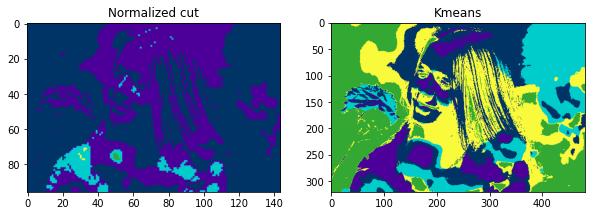

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  2.1066785426465677
Entropy for cluster  1  =  2.800052264513792
Entropy for cluster  2  =  1.1936880054065477
Entropy for cluster  3  =  2.346022859191988
Entropy for cluster  4  =  2.876463459104363
Conditional Entropy(weighted sum of entropies) =  2.1895219419444456
****************************************** 
F-measure for cluster = 0 = 0.27619824819106686
F-measure for cluster = 1 = 0.3456728675418404
F-measure for cluster = 2 = 0.5858890043811503
F-measure for cluster = 3 = 0.24967673680498412
F-measure for cluster = 4 = 0.46045364891518736
Total F = 0.3835781011668459
*****Normalized cut******
Entropy for cluster  0  =  2.592112223028167
Entropy for cluster  1  =  2.7385045408266806
Entropy for cluster  2  =  2.0403733936884962
Entropy for cluster  3  =  0.9544340029249649
Entropy for cluster  4  =  2.5929187806586014
Conditional Entropy(weighted sum of entropies) =  2.678654168727939
**********************************

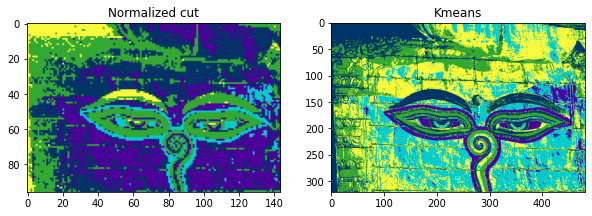

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  0.7818205711554553
Entropy for cluster  1  =  1.2710367548038346
Entropy for cluster  2  =  1.3118667810867346
Entropy for cluster  3  =  1.0357705805650708
Entropy for cluster  4  =  0.9974790220777767
Conditional Entropy(weighted sum of entropies) =  1.067547369889248
****************************************** 
F-measure for cluster = 0 = 0.4589814733157406
F-measure for cluster = 1 = 0.23595497269383664
F-measure for cluster = 2 = 0.313158364577754
F-measure for cluster = 3 = 0.4210946544772246
F-measure for cluster = 4 = 0.3511081967213115
Total F = 0.35605953235717347
*****Normalized cut******
Entropy for cluster  0  =  1.0929583478308884
Entropy for cluster  1  =  1.069360880369257
Entropy for cluster  2  =  1.4114756598983675
Entropy for cluster  3  =  1.4296521703416967
Entropy for cluster  4  =  1.1538591866275958
Conditional Entropy(weighted sum of entropies) =  1.2131122595140365
*********************************

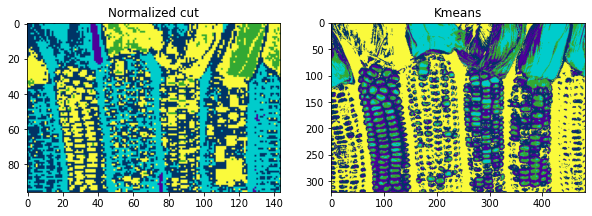

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  2.28986564285096
Entropy for cluster  1  =  2.6199452226972695
Entropy for cluster  2  =  2.32260762979843
Entropy for cluster  3  =  3.3213060292618106
Entropy for cluster  4  =  2.2495751259824246
Conditional Entropy(weighted sum of entropies) =  2.7344384976351517
****************************************** 
F-measure for cluster = 0 = 0.25937192653415975
F-measure for cluster = 1 = 0.23724996688303085
F-measure for cluster = 2 = 0.2566269849572149
F-measure for cluster = 3 = 0.2784886556280626
F-measure for cluster = 4 = 0.2959544456436786
Total F = 0.26553839592922934
*****Normalized cut******
Entropy for cluster  0  =  2.9774063043661236
Entropy for cluster  1  =  3.0281934908671913
Entropy for cluster  2  =  2.892668852521027
Entropy for cluster  3  =  3.042381162616708
Entropy for cluster  4  =  1.8759095870657612
Conditional Entropy(weighted sum of entropies) =  2.999528920034994
************************************

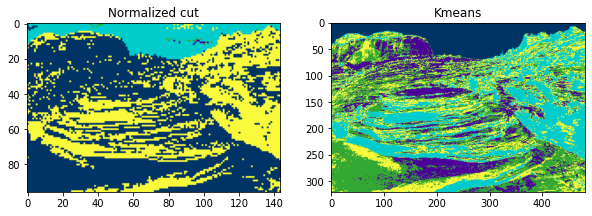

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  1.3819348759493706
Entropy for cluster  1  =  0.21721515482675266
Entropy for cluster  2  =  1.8060827905246406
Entropy for cluster  3  =  1.7805216205620027
Entropy for cluster  4  =  1.9279601893730838
Conditional Entropy(weighted sum of entropies) =  1.5352181239140563
****************************************** 
F-measure for cluster = 0 = 0.4500714109296307
F-measure for cluster = 1 = 0.9835169576848949
F-measure for cluster = 2 = 0.4596184521151024
F-measure for cluster = 3 = 0.3183686518085495
F-measure for cluster = 4 = 0.19402178693035468
Total F = 0.4811194518937064
*****Normalized cut******
Entropy for cluster  0  =  1.221685924235387
Entropy for cluster  1  =  1.918374533961123
Entropy for cluster  2  =  1.4060075793123286
Entropy for cluster  3  =  1.8599483651679491
Entropy for cluster  4  =  0.7219280948873623
Conditional Entropy(weighted sum of entropies) =  1.8205752308881764
********************************

In [165]:

for I in range(0,5):
    print("image ",I+1 )
    kL=[]
    for j in  range(0,len(Segmented_Labels[I])):
       kL.append(colors[int(Segmented_Labels[I][j])])


    x,y,z=Segmented_imgs[I].shape
    f, axarr = plt.subplots(1,2,figsize=(10,10))
    axarr[0].imshow(Segmented_imgsN[I])
    axarr[0].set_title('Normalized cut')
    axarr[1].imshow(np.array(kL).reshape(x,y,z))
    axarr[1].set_title('Kmeans')
 
    sumF=0
    plt.show()
    for s in range(0,5):
  
       print("For segmention ",s+1)
       ##Kmeans
       print("*****KMEANS******")
       CM=contingency_matrix(TrialGT[I][s], Segmented_Labels[I])
       entropy=Conditional_entropy(CM.T)
       print('****************************************** ')
       sumF = sumF+Fmeasure(CM.T)
       print("*****Normalized cut******")
       x=np.array(Segmented_imgsN[I].shape[0])
       y=np.array(Segmented_imgsN[I].shape[1])
       t=cv2.resize(TrialGT[I][s], dsize=(x,y))
       
       CM=contingency_matrix(np.array(t),LabelsN[I])
       entropy=Conditional_entropy(CM.T)
       print('****************************************** ')
       sumF = sumF+Fmeasure(CM.T)




  


    

  
  

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]]
[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]]


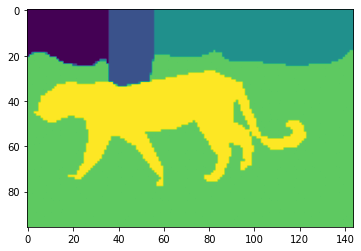

In [149]:
#Segmented_imgsN
#LabelsN
#Segmented_Labels
#
print(TrialGT[i][1])

x=np.array(Segmented_imgsN[0]).shape[0]
y=np.array(Segmented_imgsN[0]).shape[1]
  
img = Image.fromarray(TrialGT[0][0].astype('uint8'))
 # print(img.size)
img = cv2.resize(TrialGT[0][0], dsize=(w,h))
#TrialGT[i][1].reshape(h,w,3)
#print(np.array(LabelsN[0]).shape)

print(img)
plt.imshow(img)
plt.show()
#for i in range(0,5):
#  
#  
#
#
#for j in  range(0,len(tl)):
#    formedimg.append(colors[tl[j]])